# Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. 

# Importing Data

In [2]:
# Define path

path = r'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 6/Final Data Project/02 Data/Prepared Data'

In [3]:
path

'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 6/Final Data Project/02 Data/Prepared Data'

In [4]:
# Import most updated data

df = pd.read_csv(os.path.join(path, 'AB_US_2020_clean.csv'))

# Data Wrangling

In [5]:
df.shape

(226030, 17)

In [6]:
df.head()

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,0,38585,Charming Victorian home - twin beds + breakfast,165529,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,1,80905,French Chic Loft,427027,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,3,155305,Cottage! BonPaul + Sharky's Hostel,746673,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,4,160594,Historic Grove Park,769252,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [7]:
df["last_review"] = df["last_review"].fillna("01/01/01") #Fill the null last_review values with 01/01/01

df["last_review"] = pd.to_datetime(df["last_review"]) #Convert the last review to datetime

print(df["last_review"]) #Print the last review

0        2020-02-16
1        2020-07-09
2        2019-11-30
3        2020-09-22
4        2015-10-19
            ...    
226025   2001-01-01
226026   2001-01-01
226027   2001-01-01
226028   2001-01-01
226029   2001-01-01
Name: last_review, Length: 226030, dtype: datetime64[ns]


In [8]:
df.head()

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,0,38585,Charming Victorian home - twin beds + breakfast,165529,NaN,28804,35.65146,-82.62792,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville
1,1,80905,French Chic Loft,427027,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville
2,2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.81,2,298,Asheville
3,3,155305,Cottage! BonPaul + Sharky's Hostel,746673,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,2020-09-22,2.39,5,0,Asheville
4,4,160594,Historic Grove Park,769252,NaN,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.52,1,0,Asheville


In [9]:
# Creating a new dataframe with median Airbnb prices grouped by last review dates

df2 = df.groupby('last_review').agg({'price': ['median']})

In [10]:
df2.head()

,price
,median
last_review,
2001-01-01,150.0
2010-03-28,95.0
2011-03-17,65.0
2011-05-21,105.0
2011-05-23,100.0


In [11]:
# Checking data types

df2.dtypes

price  median    float64
dtype: object

In [12]:
df2.head(20)

,price
,median
last_review,
2001-01-01,150.0
2010-03-28,95.0
2011-03-17,65.0
2011-05-21,105.0
2011-05-23,100.0
2011-08-29,150.0
2011-09-19,70.0
2011-09-30,80.0


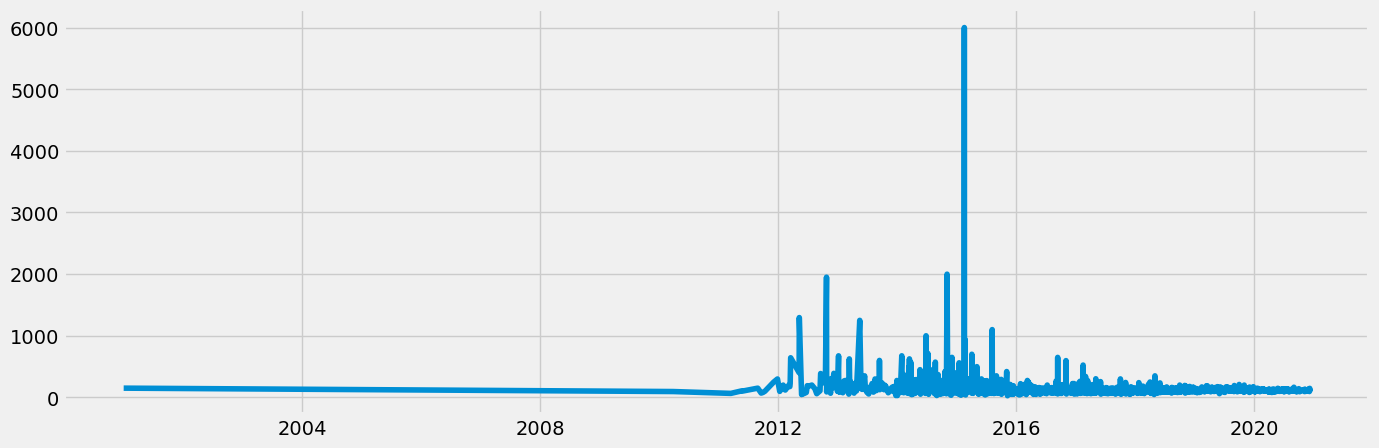

In [13]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df2)

In [14]:
# having trouble finding a takeaway from the chart above

# Based on this chart, prices were highest on the Airbnb listing when the last review was given between 2014-2016. 
# What can I take away from this information?

In [15]:
# Creating a new dataframe with median Airbnb availability grouped by date of last reviews

df3 = df.groupby('last_review').agg({'availability_365': ['median']})

In [16]:
df3.head()

,availability_365
,median
last_review,
2001-01-01,143.0
2010-03-28,365.0
2011-03-17,89.0
2011-05-21,365.0
2011-05-23,365.0


In [17]:
# Checking data types

df3.dtypes

availability_365  median    float64
dtype: object

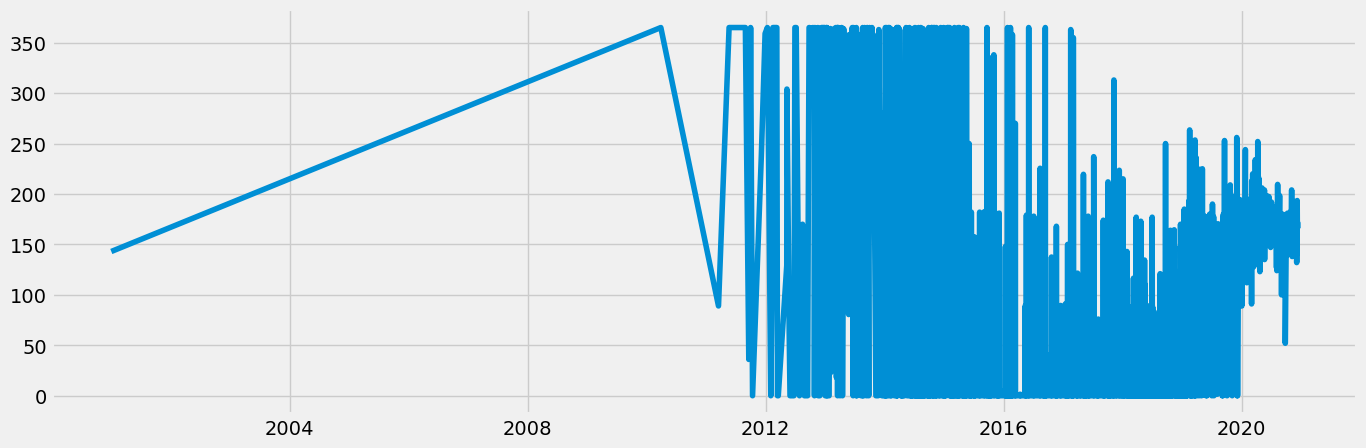

In [18]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df3)

### After considering the two graphs, I am choosing to use the comparison of last review vs. price because the graph comparing availability over time is not as helpful

# Time Series Analysis: Decomposition

In [19]:
# Decompose the time series using an additive model

decomp = sm.tsa.seasonal_decompose(df2, model='additive', period=1)


In [20]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

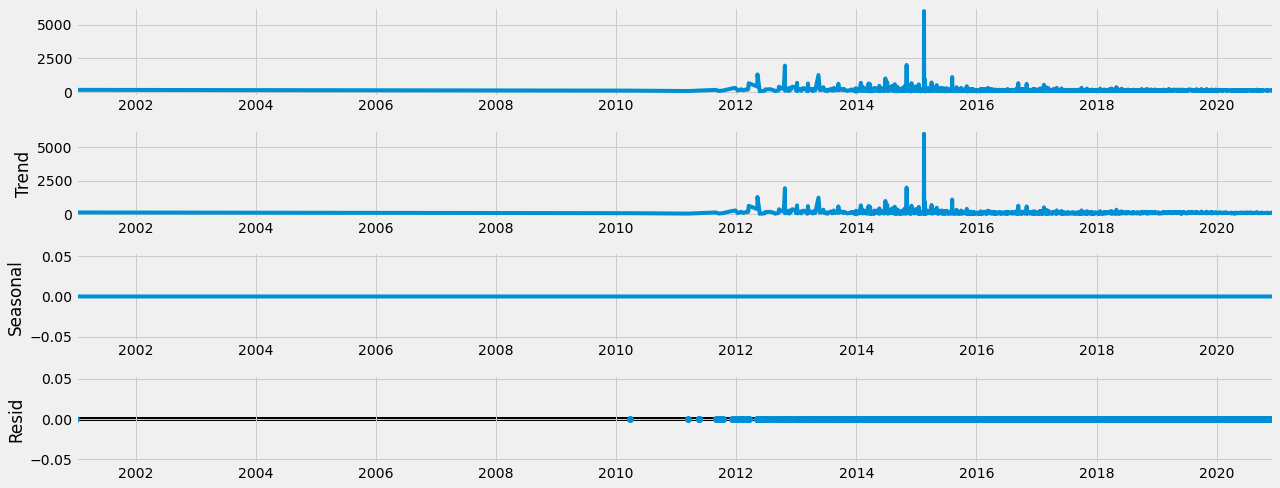

In [22]:
# Plot the separate components

decomp.plot()
plt.show()

# Stationarity Test

In [23]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Importing the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df2['price'])

Dickey-Fuller Stationarity test:
Test Statistic                -7.661973e+00
p-value                        1.679316e-11
Number of Lags Used            1.900000e+01
Number of Observations Used    2.358000e+03
Critical Value (1%)           -3.433126e+00
Critical Value (5%)           -2.862767e+00
Critical Value (10%)          -2.567423e+00
dtype: float64


### In this Dickey-Fuller Stationarity Test, the test statistic of -7.6 is smaller than the critical value of -2.86 at a 5% confidence interval. Therefore, we CAN reject the null hypothesis. However, the p-value is greater than .05, so the result is not significant.

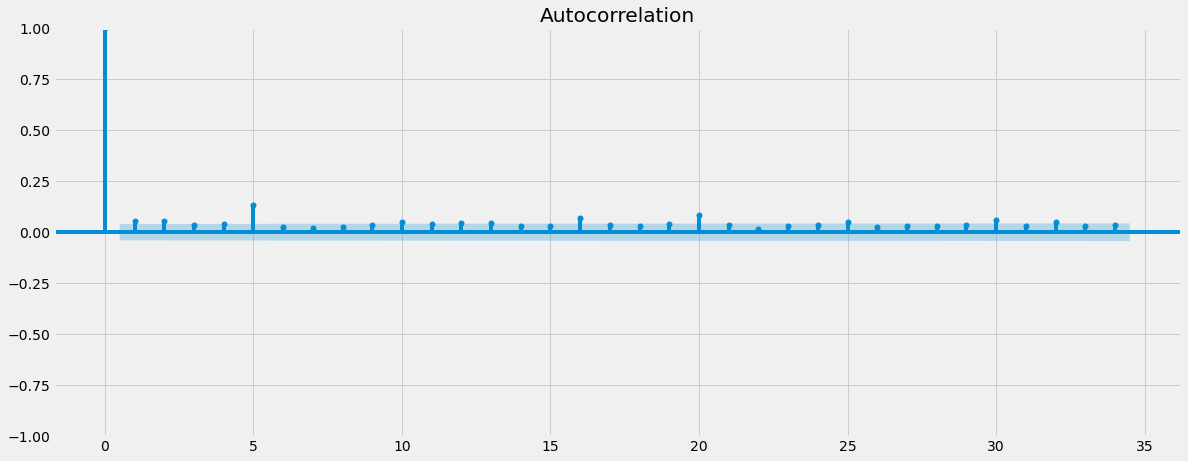

In [24]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

### It appears that there are only 2-3 points outside of the confidence interval. For the most part, I would argue that this data set is stationary (there are few significantly correlated lags).

# Stationarizing Data

In [25]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = df2 - df2.shift(1)

In [26]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [27]:
# Checking values and headers

data_diff.head()

,price
,median
last_review,
2010-03-28,-55.0
2011-03-17,-30.0
2011-05-21,40.0
2011-05-23,-5.0
2011-08-29,50.0


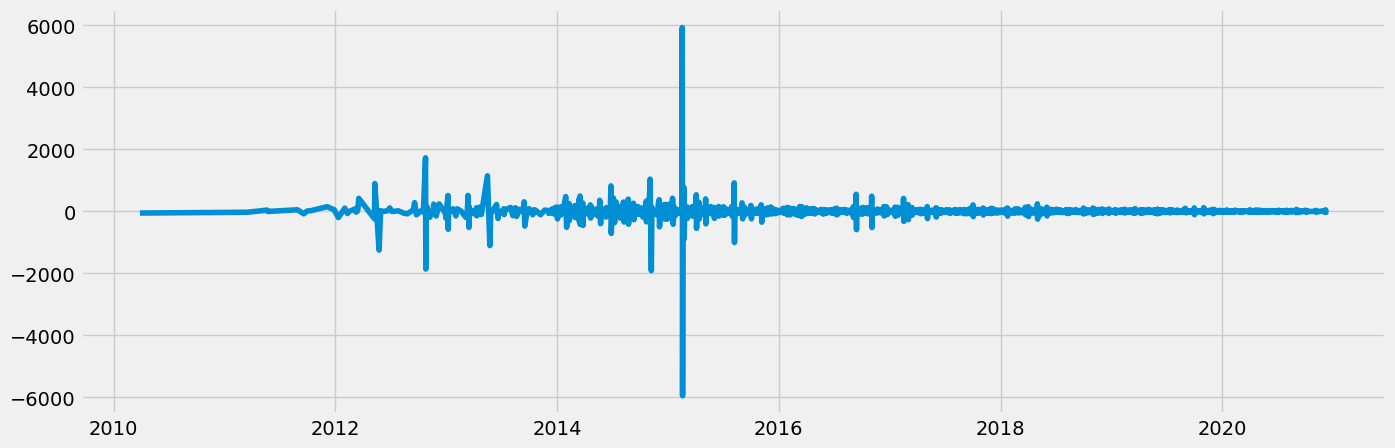

In [28]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [29]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.527247e+01
p-value                        4.696438e-28
Number of Lags Used            2.700000e+01
Number of Observations Used    2.349000e+03
Critical Value (1%)           -3.433137e+00
Critical Value (5%)           -2.862771e+00
Critical Value (10%)          -2.567425e+00
dtype: float64


### ^ need help interpreting this Dickey Fuller test. 

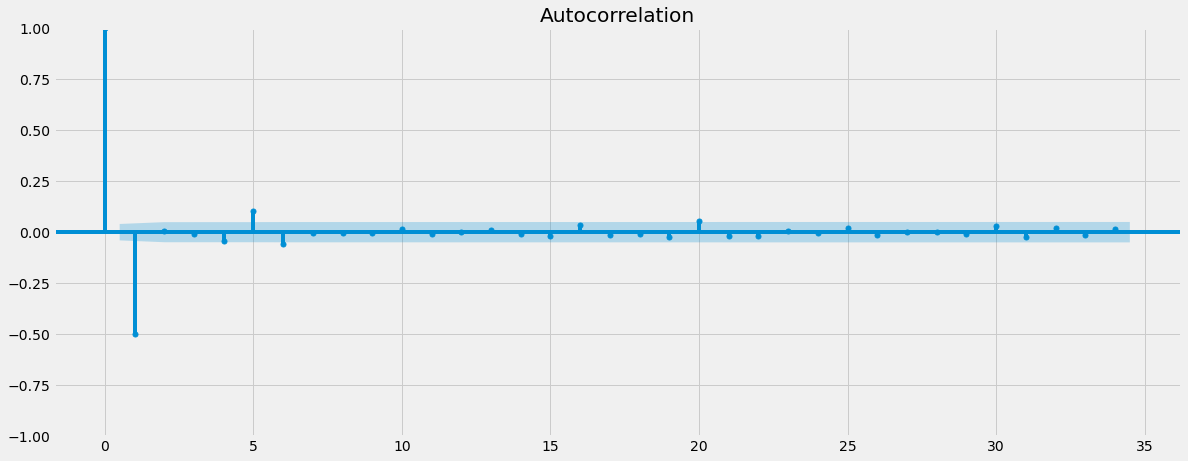

In [30]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

### ^ If anything, there are more significant lags outside of the confidence interval. Confused by this